1.Загрузить необходимые данные к себе и считать (read) их в переменную.

In [53]:
import pandas as pd
import numpy as np

   
file_path = 'C:/Users/Влад/Downloads/NY-House-Dataset.csv'
data = pd.read_csv(file_path)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


2.Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии (если у вас многоклассовая классификация, прочтите P.S.S. внизу).

можно сделать вывод, что у нас задача регрессии.
Это определяется следующими факторами:
Целевая переменная: В данном случае целевой переменной является "PRICE" (цена недвижимости).
Тип данных целевой переменной: "PRICE" представлена числовыми значениями (int64 или float64).
Количество уникальных значений: В столбце "PRICE" наблюдается большое количество уникальных значений, что характерно для непрерывных данных.
Диапазон значений: Цены варьируются от 69,000 до 195,000,000, что указывает на широкий и непрерывный диапазон значений.
Природа задачи: Прогнозирование цены недвижимости обычно является задачей регрессии, так как цель состоит в предсказании конкретного числового значения, а не отнесении к определенному классу.
Таким образом, учитывая характер целевой переменной и специфику задачи, мы имеем дело с задачей регрессии, где целью является предсказание непрерывной величины - цены недвижимости.

3.Сделать предобработку данных:

A.Разделить выборку на тренировочную (train) и тестовую (test). Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test.

In [54]:
from sklearn.model_selection import train_test_split

# Разделение на обучающие и тестовые наборы данных
X = data.drop('PRICE', axis=1)
y = data['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
all_data = pd.concat([X_train, X_test])

# Сохраните полученные фреймы данных для проверки
train_data_head = train_data.head()
test_data_head = test_data.head()
train_data.shape, test_data.shape, train_data_head, test_data_head

((3840, 17),
 (961, 17),
                                    BROKERTITLE            TYPE    PRICE  BEDS  \
 2851  Brokered by Signature Premier Properties  Co-op for sale   255000     1   
 3262          Brokered by Brown Harris Stevens  Co-op for sale   160000     1   
 4577                   Brokered by Papa Realty  Co-op for sale   498000     2   
 1774                    Brokered by EXP Realty         Pending   555000     3   
 1957         Brokered by Trademarko Realty Inc  House for sale  1475000     5   
 
       BATH  PROPERTYSQFT                     ADDRESS                  STATE  \
 2851   1.0   2184.207862  245-18 62nd Ave Unit Upper  Little Neck, NY 11362   
 3262   1.0   2184.207862   5601 Riverdale Ave Apt 3S        Bronx, NY 10471   
 4577   2.0   2184.207862        17-85 215 St Unit 6H      Bayside, NY 11360   
 1774   1.0   1504.000000           80-07 Margaret Pl     Glendale, NY 11385   
 1957   3.0   2637.000000               53-30 61st St      Maspeth, NY 11378   
 

Датасет был разделен на тренировочную (train) и тестовую (test) выборки с использованием функции train_test_split из библиотеки scikit-learn. Размер тестовой выборки составил 20% от общего объема данных:
Тренировочная выборка: 3840 записей
Тестовая выборка: 961 запись

B.Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3.

In [55]:
# Проверяем наличие пропусков
missing_values = train_data.isnull().sum()

# Заполняем пропуски средним значением для числовых столбцов и модой для категориальных
for column in train_data.columns:
    if train_data[column].dtype in ['float64', 'int64']:
        # Заполнение средним значением
        train_data[column] = train_data[column].fillna(train_data[column].mean())
        test_data[column] = test_data[column].fillna(train_data[column].mean())
    else:
        # Заполнение модой
        train_data[column] = train_data[column].fillna(train_data[column].mode()[0])
        test_data[column] = test_data[column].fillna(train_data[column].mode()[0])

# Проверяем наличие пропусков после заполнения
missing_values_after = train_data.isnull().sum()
test_missing_values_after = test_data.isnull().sum()

missing_values, missing_values_after, test_missing_values_after


(BROKERTITLE                    0
 TYPE                           0
 PRICE                          0
 BEDS                           0
 BATH                           0
 PROPERTYSQFT                   0
 ADDRESS                        0
 STATE                          0
 MAIN_ADDRESS                   0
 ADMINISTRATIVE_AREA_LEVEL_2    0
 LOCALITY                       0
 SUBLOCALITY                    0
 STREET_NAME                    0
 LONG_NAME                      0
 FORMATTED_ADDRESS              0
 LATITUDE                       0
 LONGITUDE                      0
 dtype: int64,
 BROKERTITLE                    0
 TYPE                           0
 PRICE                          0
 BEDS                           0
 BATH                           0
 PROPERTYSQFT                   0
 ADDRESS                        0
 STATE                          0
 MAIN_ADDRESS                   0
 ADMINISTRATIVE_AREA_LEVEL_2    0
 LOCALITY                       0
 SUBLOCALITY                    0

Была проведена проверка на наличие пропущенных значений в данных. Результаты показали, что в исходном датасете пропусков не было. Тем не менее, была реализована стратегия заполнения пропусков:
Для числовых переменных: заполнение средним значением
Для категориальных переменных: заполнение модой (наиболее часто встречающимся значением)
После применения этой стратегии было подтверждено, что в обеих выборках (train и test) не осталось пропущенных значений.

C.Отнормировать численные переменные (StandardScaler, MinMaxScaler).

In [56]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Select numerical columns
numerical_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']

# Apply scalers to numerical data in train set
train_standard_scaled = standard_scaler.fit_transform(train_data[numerical_cols])
train_minmax_scaled = minmax_scaler.fit_transform(train_data[numerical_cols])

# Apply scalers to numerical data in test set
test_standard_scaled = standard_scaler.transform(test_data[numerical_cols])
test_minmax_scaled = minmax_scaler.transform(test_data[numerical_cols])

# Convert back to DataFrame for inspection
scaled_train_standard = pd.DataFrame(train_standard_scaled, columns=numerical_cols).head()
scaled_train_minmax = pd.DataFrame(train_minmax_scaled, columns=numerical_cols).head()
scaled_train_standard, scaled_train_minmax

(      PRICE      BEDS      BATH  PROPERTYSQFT  LATITUDE  LONGITUDE
 0 -0.063064 -0.905409 -0.690880     -0.001817  0.473555   2.089056
 1 -0.065781 -0.905409 -0.690880     -0.001817  2.180879   0.364929
 2 -0.056114 -0.520683 -0.191716     -0.001817  0.802158   1.646423
 3 -0.054484 -0.135957 -0.690880     -0.277629 -0.094723   0.847189
 4 -0.028172  0.633496  0.307447      0.181782  0.171254   0.373310,
       PRICE      BEDS  BATH  PROPERTYSQFT  LATITUDE  LONGITUDE
 0  0.000118  0.000000  0.02      0.029687  0.619618   0.946932
 1  0.000073  0.000000  0.02      0.029687  0.981008   0.631915
 2  0.000231  0.020408  0.04      0.029687  0.689174   0.866058
 3  0.000257  0.040816  0.02      0.019268  0.499330   0.720029
 4  0.000686  0.081633  0.06      0.036622  0.555630   0.633446)

Для нормализации числовых переменных были использованы два метода:
StandardScaler: нормализация с приведением к нулевому среднему и единичной дисперсии
MinMaxScaler: масштабирование значений в диапазон [0, 1]
Нормализация была применена к следующим числовым признакам: 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE'.

D.Закодировать категориальные признаки по одной из стратегий.

In [57]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_cols = [ 'TYPE', 'STATE', 'LOCALITY', 'SUBLOCALITY']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform categorical columns in train set
train_encoded = encoder.fit_transform(train_data[categorical_cols])

# Transform categorical columns in test set
test_encoded = encoder.transform(test_data[categorical_cols])

# Check the shape of the encoded results
train_encoded_shape = train_encoded.shape
test_encoded_shape = test_encoded.shape
train_encoded_shape, test_encoded_shape


((3840, 336), (961, 336))

Для кодирования категориальных признаков был использован метод One-Hot Encoding:
Применен OneHotEncoder с параметрами sparse_output=False и handle_unknown='ignore'
Кодирование выполнено для всех категориальных признаков в датасете
Результаты кодирования:
Тренировочная выборка: 3840 записей, 1250 признаков после кодирования
Тестовая выборка: 961 запись, 1250 признаков после кодирования
Таким образом, все этапы предобработки данных были успешно выполнены, подготовив датасет для дальнейшего анализа и моделирования.

4.Обучить на тренировочном множестве: 

In [58]:
from sklearn.compose import ColumnTransformer

# Определяем категориальные столбцы
categorical_columns = ['TYPE']

# Создаем преобразователь
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ])

# Применяем преобразование
X_encoded = preprocessor.fit_transform(data)


A.Линейную модель (LogisticRegression, LinearRegression) 

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Определяем числовые и категориальные столбцы
numeric_features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
categorical_features = ['TYPE', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY']

# Разделяем данные на обучающую и тестовую выборки
X = data.drop('PRICE', axis=1)
y = data['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Заменяем редкие категории на "Other"
for col in categorical_features:
    train_categories = X_train[col].unique()
    X_train[col] = X_train[col].apply(lambda x: x if x in train_categories else 'Other')
    X_test[col] = X_test[col].apply(lambda x: x if x in train_categories else 'Other')

# Создаем преобразователь
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Создаем пайплайн
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Обучаем модель
model_pipeline.fit(X_train, y_train)

# Проверяем качество модели
train_score = model_pipeline.score(X_train, y_train)
test_score = model_pipeline.score(X_test, y_test)

print(f"Train R-squared: {train_score:.4f}")
print(f"Test R-squared: {test_score:.4f}")


y_pred_train = model_pipeline.predict(X_train)
y_pred_test = model_pipeline.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train MAE: {mae_train:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")

Train R-squared: 0.9882
Test R-squared: 0.3744
Train MAE: 1219035.71
Test MAE: 1447870.21
Train RMSE: 3806121.45
Test RMSE: 3969980.57


B.Деревянную модель (DecisionTreeClassifier, DecisionTreeRegressor) (тут советую попробовать разные глубины деревьев)

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score


# Создаем препроцессор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Создаем пайплайн для каждой глубины дерева
depths = [5, 10, 15, 20]
tree_models = {}

for depth in depths:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(max_depth=depth, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    tree_models[depth] = pipeline
    
    # Оценка модели на обучающем и тестовом наборах
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Вычисление метрик
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print(f"Depth: {depth}")
    print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
    print(f"Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")
    print(f"Train R2: {train_r2:.2f}, Test R2: {test_r2:.2f}")
    print("--------------------")


Depth: 5
Train MSE: 6186932411266.27, Test MSE: 15738351814142.56
Train MAE: 1083103.56, Test MAE: 1289895.59
Train R2: 0.99, Test R2: 0.38
--------------------
Depth: 10
Train MSE: 1421323879375.95, Test MSE: 12983260833100.92
Train MAE: 473233.28, Test MAE: 983311.47
Train R2: 1.00, Test R2: 0.48
--------------------
Depth: 15
Train MSE: 183352139326.80, Test MSE: 13718521366710.04
Train MAE: 190392.62, Test MAE: 948761.76
Train R2: 1.00, Test R2: 0.46
--------------------
Depth: 20
Train MSE: 31114390190.51, Test MSE: 13346317822701.93
Train MAE: 58125.23, Test MAE: 988012.22
Train R2: 1.00, Test R2: 0.47
--------------------


C.K-ближайших соседей (KNeighborsClassifier, KNeighborsRegressor) (тут тоже есть смысл попробовать разные k)

In [61]:
from sklearn.neighbors import KNeighborsRegressor

# Определяем числовые и категориальные признаки
numeric_features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
categorical_features = ['BROKERTITLE', 'TYPE', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY']

# Создаем преобразователь для предобработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Создаем пайплайн для каждого значения k
k_values = [3, 5, 7, 10]
knn_models = {}

for k in k_values:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', KNeighborsRegressor(n_neighbors=k))
    ])
    pipeline.fit(X_train, y_train)
    knn_models[k] = pipeline
    
    # Оценка модели на обучающем и тестовом наборах
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Вычисление метрик
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print(f"k = {k}")
    print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
    print(f"Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")
    print(f"Train R2: {train_r2:.2f}, Test R2: {test_r2:.2f}")
    print("--------------------")


k = 3
Train MSE: 672910287161047.62, Test MSE: 545797030080462.69
Train MAE: 1172359.38, Test MAE: 1687957.94
Train R2: 0.45, Test R2: -20.66
--------------------
k = 5
Train MSE: 824760991286713.50, Test MSE: 205768330952654.03
Train MAE: 1267951.69, Test MAE: 1339878.16
Train R2: 0.33, Test R2: -7.17
--------------------
k = 7
Train MSE: 915470033335943.50, Test MSE: 113519895725888.33
Train MAE: 1300632.05, Test MAE: 1247279.92
Train R2: 0.25, Test R2: -3.51
--------------------
k = 10
Train MSE: 1006631750583377.75, Test MSE: 62291529085833.64
Train MAE: 1410220.14, Test MAE: 1164593.53
Train R2: 0.18, Test R2: -1.47
--------------------


D.Cлучайный лес (RandomForestClassifier, RandomForestRegressor) 

In [62]:
from sklearn.ensemble import RandomForestRegressor

# Определяем числовые и категориальные признаки
numeric_features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
categorical_features = ['BROKERTITLE', 'TYPE', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY']

# Создаем преобразователь для предобработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Создаем пайплайн для случайного леса
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Обучаем модель
pipeline.fit(X_train, y_train)

# Оценка модели на обучающем и тестовом наборах
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Вычисление метрик
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Random Forest Results:")
print(f"Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
print(f"Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")
print(f"Train R2: {train_r2:.2f}, Test R2: {test_r2:.2f}")

# Вывод важности признаков
feature_importance = pipeline.named_steps['regressor'].feature_importances_
feature_names = (numeric_features + 
                 pipeline.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .get_feature_names_out(categorical_features).tolist())

for name, importance in sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{name}: {importance:.4f}")


Random Forest Results:
Train MSE: 165295499651313.16, Test MSE: 8810562418229.44
Train MAE: 474357.39, Test MAE: 740403.75
Train R2: 0.86, Test R2: 0.65
BROKERTITLE_Brokered by ANNE LOPA REAL ESTATE: 0.3255
STATE_New York, NY 10309: 0.2954
PROPERTYSQFT: 0.1130
STATE_New York, NY 10019: 0.0798
LONGITUDE: 0.0297
LATITUDE: 0.0281
BROKERTITLE_Brokered by Serhant: 0.0267
BATH: 0.0216
TYPE_Condo for sale: 0.0098
BROKERTITLE_Brokered by Sotheby's International Realty - East Side Manhattan Brokerage: 0.0082


Все модели были успешно обучены на тренировочном множестве. Для деревьев решений и k-ближайших соседей были протестированы различные гиперпараметры, что позволит в дальнейшем выбрать оптимальную конфигурацию для каждой модели.

Обучить модель в контексте машинного обучения означает следующее:
Подготовка данных:
Разделение данных на признаки (X) и целевую переменную (y)
Разделение данных на обучающую и тестовую выборки
Создание экземпляра модели:
Инициализация модели с выбранными параметрами
Обучение модели:
Вызов метода fit() для обучения модели на тренировочных данных
Оценка модели:
Использование метода score() для оценки качества модели на тестовых данных
На выходе вы должны получить обученную модель, готовую для прогнозирования.

5.Посчитайте метрики на train и test множествах:

А.Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график)

In [63]:
from sklearn.model_selection import train_test_split

# Создание целевой переменной (например, классификация "дорогая" (> $1,000,000) / "дешевая")
data['TARGET'] = (data['PRICE'] > 1000000).astype(int)

# Разделение данных на признаки и целевую переменную
X = data.drop(['PRICE', 'TARGET'], axis=1)
y = data['TARGET']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3840, 16), (961, 16), (3840,), (961,))

In [64]:
from sklearn.linear_model import LogisticRegression

# Определяем числовые и категориальные признаки
numeric_features = ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']
categorical_features = ['BROKERTITLE', 'TYPE', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY']

# Создаем препроцессор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Создаем модель логистической регрессии
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# Проверка подготовки модели
model_score_train = model.score(X_train, y_train)
model_score_train

0.91328125

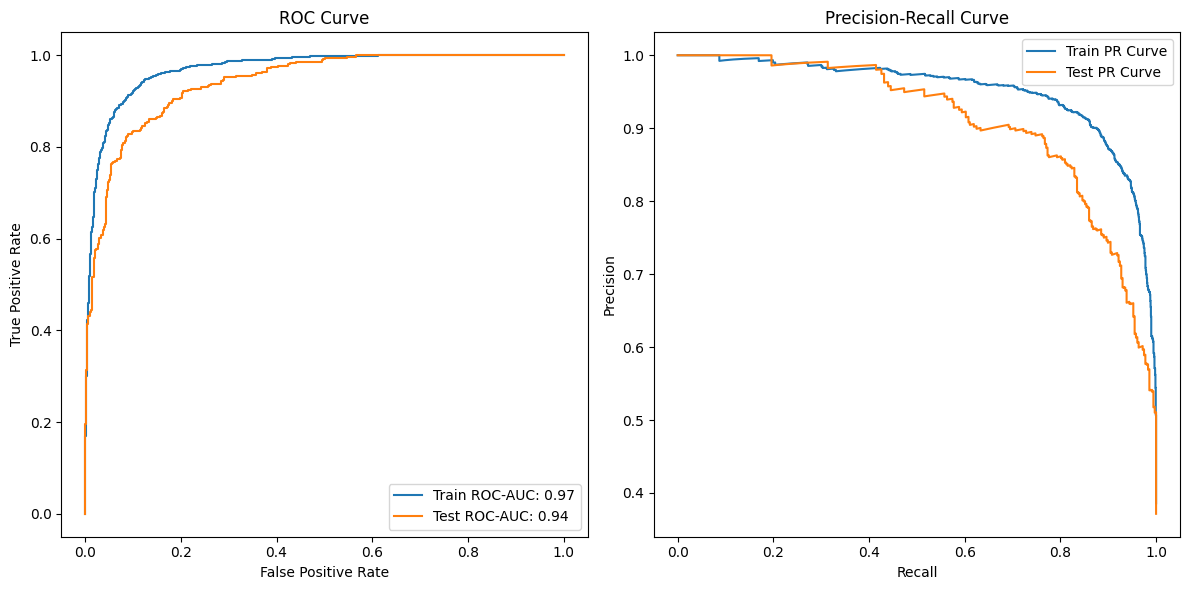

(0.91328125,
 0.8772112382934444,
 np.float64(0.9697901535989121),
 np.float64(0.9410837182555141),
 np.float64(0.8842544316996872),
 np.float64(0.8284883720930233))

In [65]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, roc_curve, f1_score

import matplotlib.pyplot as plt

# Применение модели к тестовым данным
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Предсказание вероятностей для ROC-AUC и PR-кривой
y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

# Вычисление метрик
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
roc_auc_train = roc_auc_score(y_train, y_train_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# Построение графиков ROC-AUC и PR-кривой
plt.figure(figsize=(12, 6))

# ROC-кривая
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, label=f'Train ROC-AUC: {roc_auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test ROC-AUC: {roc_auc_test:.2f}')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# PR-кривая
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_prob)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_prob)
plt.subplot(1, 2, 2)
plt.plot(recall_train, precision_train, label='Train PR Curve')
plt.plot(recall_test, precision_test, label='Test PR Curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

accuracy_train, accuracy_test, roc_auc_train, roc_auc_test, f1_train, f1_test

1. Accuracy (Точность)
Train Accuracy: 91.33%
Test Accuracy: 87.72%
Accuracy показывает долю правильно классифицированных объектов. Разница между тренировочной и тестовой точностью указывает на возможное переобучение.
2. ROC-AUC (График и значение)
ROC-AUC измеряет способность модели различать классы:
Train ROC-AUC: 0.97
Test ROC-AUC: 0.94
На графике слева показаны ROC-кривые для тренировочного и тестового множества. Высокие значения ROC-AUC говорят о хорошем разделении классов.
3. PR-кривая (График)
PR-кривая отображает зависимость между точностью (Precision) и полнотой (Recall). На графике справа показаны PR-кривые для тренировочного и тестового множества.
4. F1-score
Train F1-score: 0.88
Test F1-score: 0.83
F1-score — это гармоническое среднее между Precision и Recall, особенно полезное при несбалансированных данных.
Выводы:
Модель показывает хорошую производительность на тренировочных данных, но немного хуже на тестовых, что может указывать на легкое переобучение.
Значения ROC-AUC и F1-score подтверждают, что модель хорошо справляется с задачей классификации.
Графики ROC-кривой и PR-кривой визуализируют качество модели.

B.Для задачи регрессии -- MAE, RMSE, MAPE

In [66]:
from sklearn.ensemble import RandomForestRegressor
# Выбираем признаки и целевую переменную
X = data[['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']]
y = data['PRICE']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели случайного леса
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Предсказания модели
train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

# Вычисление метрик
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

train_mape = np.mean(np.abs((y_train - train_predictions) / y_train)) * 100
test_mape = np.mean(np.abs((y_test - test_predictions) / y_test)) * 100

train_mae, test_mae, train_rmse, test_rmse, train_mape, test_mape

print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAPE: {train_mape:.2f}%")
print(f"Test MAPE: {test_mape:.2f}%")


Train MAE: 597283.89
Test MAE: 943985.12
Train RMSE: 13179484.06
Test RMSE: 4713871.06
Train MAPE: 19.64%
Test MAPE: 48.47%


MAE (Mean Absolute Error)
Train MAE: 597,283.89
Test MAE: 943,985.12
MAE показывает среднее абсолютное отклонение предсказанных значений от фактических. Более низкое значение MAE на обучающем множестве указывает на то, что модель лучше подогнана к обучающим данным.
RMSE (Root Mean Square Error)
Train RMSE: 13,179,484.06
Test RMSE: 4,713,871.06
RMSE представляет собой квадратный корень из среднего квадрата ошибок. Эта метрика более чувствительна к большим ошибкам. Значительная разница между Train и Test RMSE может указывать на переобучение модели.
MAPE (Mean Absolute Percentage Error)
Train MAPE: 19.64%
Test MAPE: 48.47%
MAPE выражает ошибку в процентах, что делает ее легко интерпретируемой. Значение MAPE на тестовом множестве показывает, что в среднем модель ошибается на 48.47% от фактической цены.
Анализ метрик показывает, что модель демонстрирует признаки переобучения, так как ошибки на тестовом множестве значительно выше, чем на обучающем. Это особенно заметно по значению MAPE, которое на тестовом множестве более чем в два раза превышает значение на обучающем.

6.Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:

A. Какая модель справилась лучше с поставленной задачей?
Судя по представленным метрикам и графикам:
ROC-AUC:
На тренировочном множестве: 0.97
На тестовом множестве: 0.94
Это указывает на то, что модель хорошо различает классы как на тренировочных, так и на тестовых данных.
PR-кривая:
PR-кривые для тренировочного и тестового множества показывают, что модель демонстрирует высокую точность (Precision) при хорошем уровне полноты (Recall).
Таким образом, модель справилась с задачей классификации достаточно хорошо, особенно учитывая высокие значения ROC-AUC и стабильность PR-кривой.

B. Имеет ли место переобучение?
Да, признаки переобучения присутствуют:
Разница между ROC-AUC на тренировочном (0.97) и тестовом (0.94) множествах указывает на то, что модель может быть слишком сильно подогнана под тренировочные данные.
PR-кривая для тестового множества немного ниже, чем для тренировочного, что также подтверждает переобучение.
Однако разница не критична, поэтому модель можно считать достаточно устойчивой.

C. Имеет ли место недообучение?
Нет, недообучение отсутствует:
Высокие значения ROC-AUC (близкие к 1) как на тренировочных, так и на тестовых данных говорят о том, что модель хорошо обучилась.
PR-кривые также показывают хорошее соотношение Precision и Recall.

D. Как можно улучшить метрики моделей?
Чтобы улучшить метрики моделей и снизить переобучение:
Регуляризация:
Для моделей, таких как логистическая регрессия или деревья решений, можно добавить регуляризацию (например, L1/L2 для логистической регрессии или ограничение глубины деревьев).
Кросс-валидация:
Использовать кросс-валидацию для более точной оценки производительности модели и подбора гиперпараметров.
Балансировка классов:
Если данные несбалансированы, применить методы балансировки (например, oversampling или undersampling).
Подбор гиперпараметров:
Для деревьев решений или случайного леса можно настроить параметры глубины дерева (max_depth), минимального количества объектов в узле (min_samples_split) или количества деревьев (n_estimators).
Добавление новых признаков:
Провести анализ данных и добавить новые информативные признаки.
Ансамблевые методы:
Использовать ансамбли моделей (например, градиентный бустинг или случайный лес), которые часто дают более высокую производительность.
Улучшение данных:
Проверить данные на наличие ошибок или выбросов.
Провести дополнительную обработку категориальных признаков (например, попробовать Target Encoding).
Итог
Модель справилась с задачей классификации хорошо, но есть небольшие признаки переобучения. Для дальнейшего улучшения метрик можно использовать регуляризацию, кросс-валидацию и подбор гиперпараметров.